In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
comorbidites = pd.read_csv('comorbidites.csv', delimiter=';')
depenses = pd.read_csv('depenses.csv', delimiter=';')
effectifs = pd.read_csv('effectifs.csv', delimiter=';')

C:\Users\saeru\AppData\Local\Temp\ipykernel_4596\3020394885.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  effectifs = pd.read_csv('effectifs.csv', delimiter=';')


In [3]:
comorbidites.head()

,annee,patho_niv1,patho_niv2,patho_niv3,top,comorbidite,libelle_comorbidite,region,dept,Ncomorb,Ntop,Proportion_comorb,patho_niv2_comorb,patho_niv3_comorb,patho_niv1_comorb,Niveau prioritaire
0,2015,Affections de longue durée (dont 31 et 32) pou...,Affections de longue durée (dont 31 et 32) pou...,Affections de longue durée (dont 31 et 32) pou...,ALD_CAT_CAT,RES_CAT_EXC,Maladies respiratoires chroniques (hors mucovi...,99,999,212080.0,1634700.0,0.129739,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,"1,2,3"
1,2015,Affections de longue durée (dont 31 et 32) pou...,Affections de longue durée (dont 31 et 32) pou...,Affections de longue durée (dont 31 et 32) pou...,ALD_CAT_CAT,TPS_ADR_EXC,Traitements antidépresseurs ou régulateurs de ...,99,999,176380.0,1634700.0,0.107898,Traitements antidépresseurs ou régulateurs de ...,Traitements antidépresseurs ou régulateurs de ...,Traitements psychotropes (hors pathologies),"1,2,3"
2,2015,Affections de longue durée (dont 31 et 32) pou...,Affections de longue durée (dont 31 et 32) pou...,Affections de longue durée (dont 31 et 32) pou...,ALD_CAT_CAT,MCV_SCO_CHR,Maladie coronaire chronique,99,999,133140.0,1634700.0,0.081445,Maladie coronaire,Maladie coronaire chronique,Maladies cardioneurovasculaires,"1,2,3"
3,2015,Affections de longue durée (dont 31 et 32) pou...,Affections de longue durée (dont 31 et 32) pou...,Affections de longue durée (dont 31 et 32) pou...,ALD_CAT_CAT,PSY_TNH_CAT,Troubles névrotiques et de l'humeur,99,999,110150.0,1634700.0,0.067381,Troubles névrotiques et de l'humeur,Troubles névrotiques et de l'humeur,Maladies psychiatriques,"1,2,3"
4,2015,Affections de longue durée (dont 31 et 32) pou...,Affections de longue durée (dont 31 et 32) pou...,Affections de longue durée (dont 31 et 32) pou...,ALD_CAT_CAT,MCV_ICA_CHR,Insuffisance cardiaque chronique,99,999,68450.0,1634700.0,0.041876,Insuffisance cardiaque,Insuffisance cardiaque chronique,Maladies cardioneurovasculaires,"1,2,3"


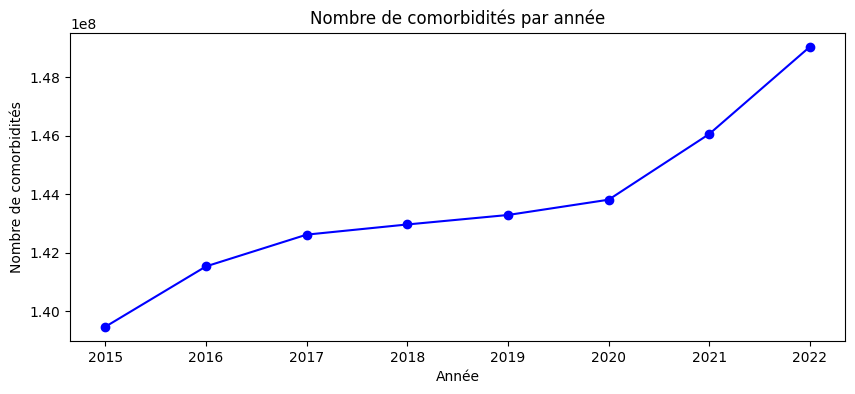

In [ ]:
yearagg_comorbidites = comorbidites.groupby('annee')['Ncomorb'].sum().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(yearagg_comorbidites['annee'], yearagg_comorbidites['Ncomorb'], color='blue', marker='o', label='')
plt.xlabel('Année')
plt.ylabel('Nombre de comorbidités')
plt.title('Nombre de comorbidités par année')
plt.grid(False)
plt.show()

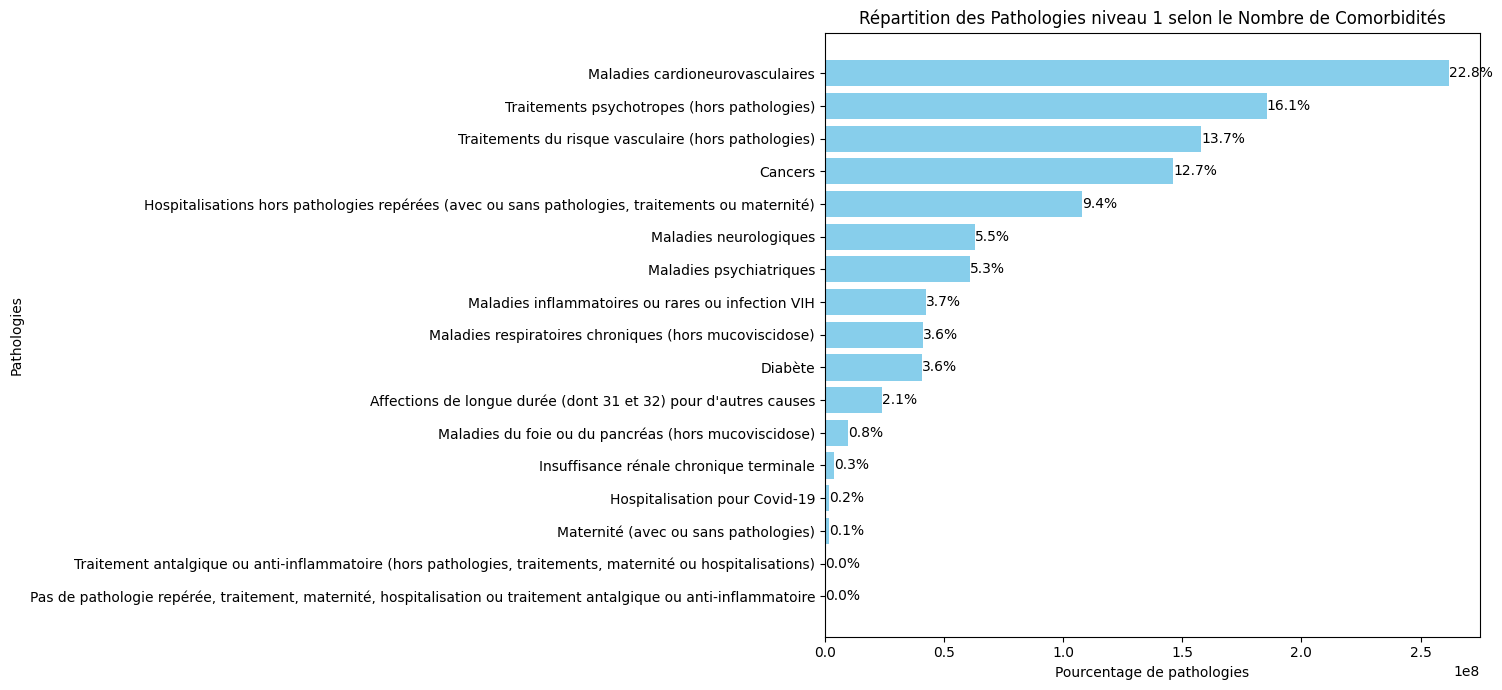

In [20]:
aggpatho1_comorbidites = comorbidites.groupby('patho_niv1')['Ncomorb'].sum().reset_index()
top_patho = aggpatho1_comorbidites.sort_values(by='patho_niv1')
top_patho['Percentage'] = (top_patho['Ncomorb'] / top_patho['Ncomorb'].sum()) * 100

# Trier par pourcentage décroissant au lieu de patho_niv1
top_patho = top_patho.sort_values(by='Percentage', ascending=False)

# Diagramme en barres horizontal
plt.figure(figsize=(15, 7)) 
plt.barh(top_patho['patho_niv1'], top_patho['Ncomorb'], color='skyblue')

# Pourcentages sur les barres
for index, value in enumerate(top_patho['Ncomorb']):
    percentage = f"{top_patho['Percentage'].iloc[index]:.1f}%"
    plt.text(value, index, percentage, va='center')

plt.xlabel('Pourcentage de pathologies')
plt.ylabel('Pathologies')
plt.title('Répartition des Pathologies niveau 1 selon le Nombre de Comorbidités')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

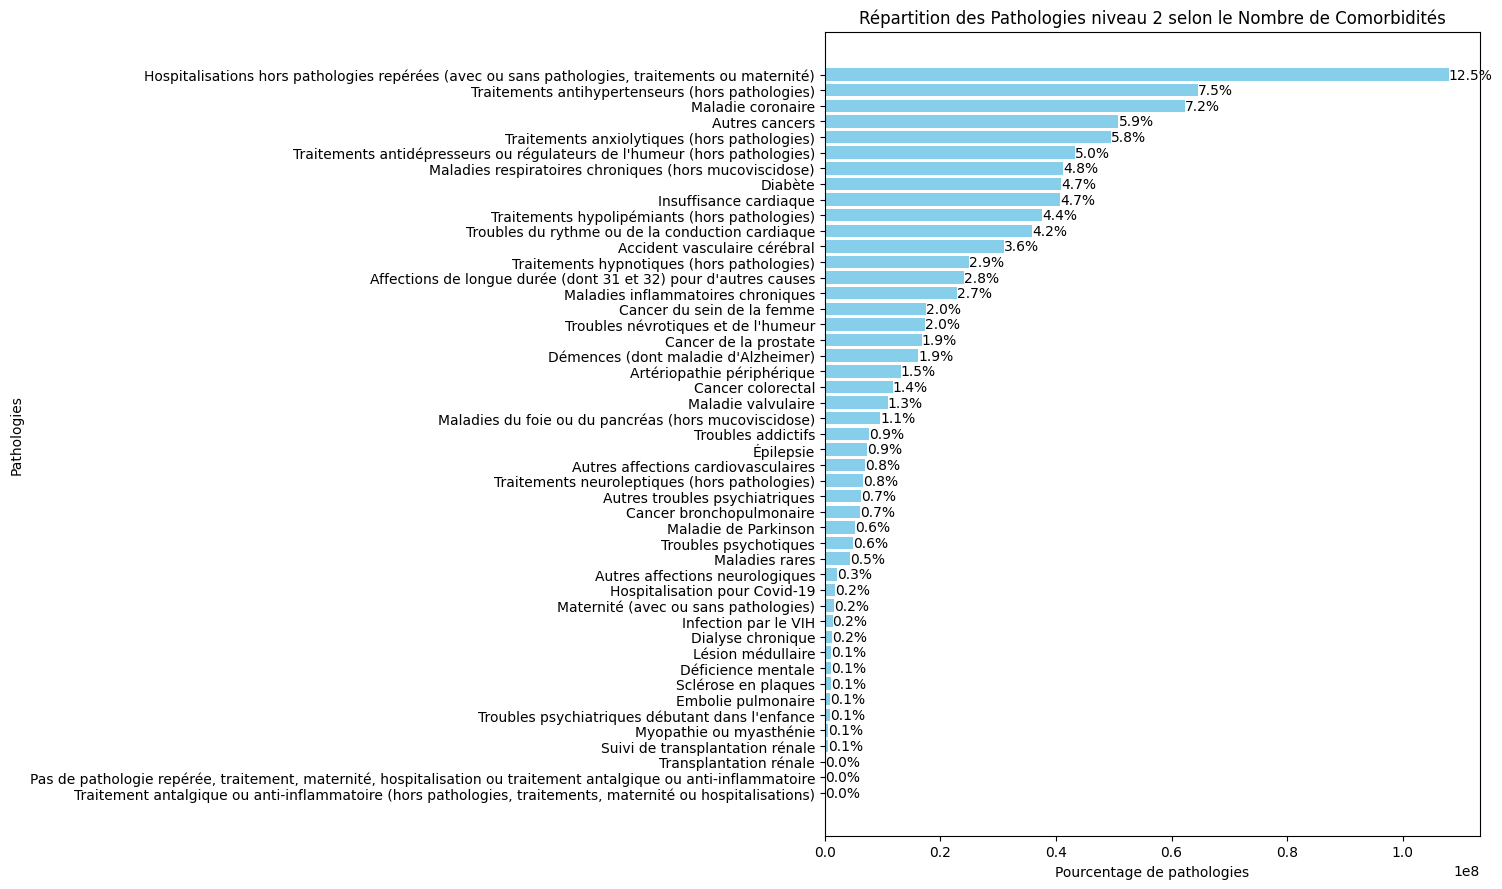

In [24]:
aggpatho2_comorbidites = comorbidites.groupby('patho_niv2')['Ncomorb'].sum().reset_index()
top_patho2 = aggpatho2_comorbidites.sort_values(by='patho_niv2')
top_patho2['Percentage'] = (top_patho2['Ncomorb'] / top_patho2['Ncomorb'].sum()) * 100

# Trier par pourcentage décroissant au lieu de patho_niv1
top_patho2 = top_patho2.sort_values(by='Percentage', ascending=False)

# Diagramme en barres horizontal
plt.figure(figsize=(15, 9)) 
plt.barh(top_patho2['patho_niv2'], top_patho2['Ncomorb'], color='skyblue')

# Pourcentages sur les barres
for index, value in enumerate(top_patho2['Ncomorb']):
    percentage = f"{top_patho2['Percentage'].iloc[index]:.1f}%"
    plt.text(value, index, percentage, va='center')

plt.xlabel('Pourcentage de pathologies')
plt.ylabel('Pathologies')
plt.title('Répartition des Pathologies niveau 2 selon le Nombre de Comorbidités')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

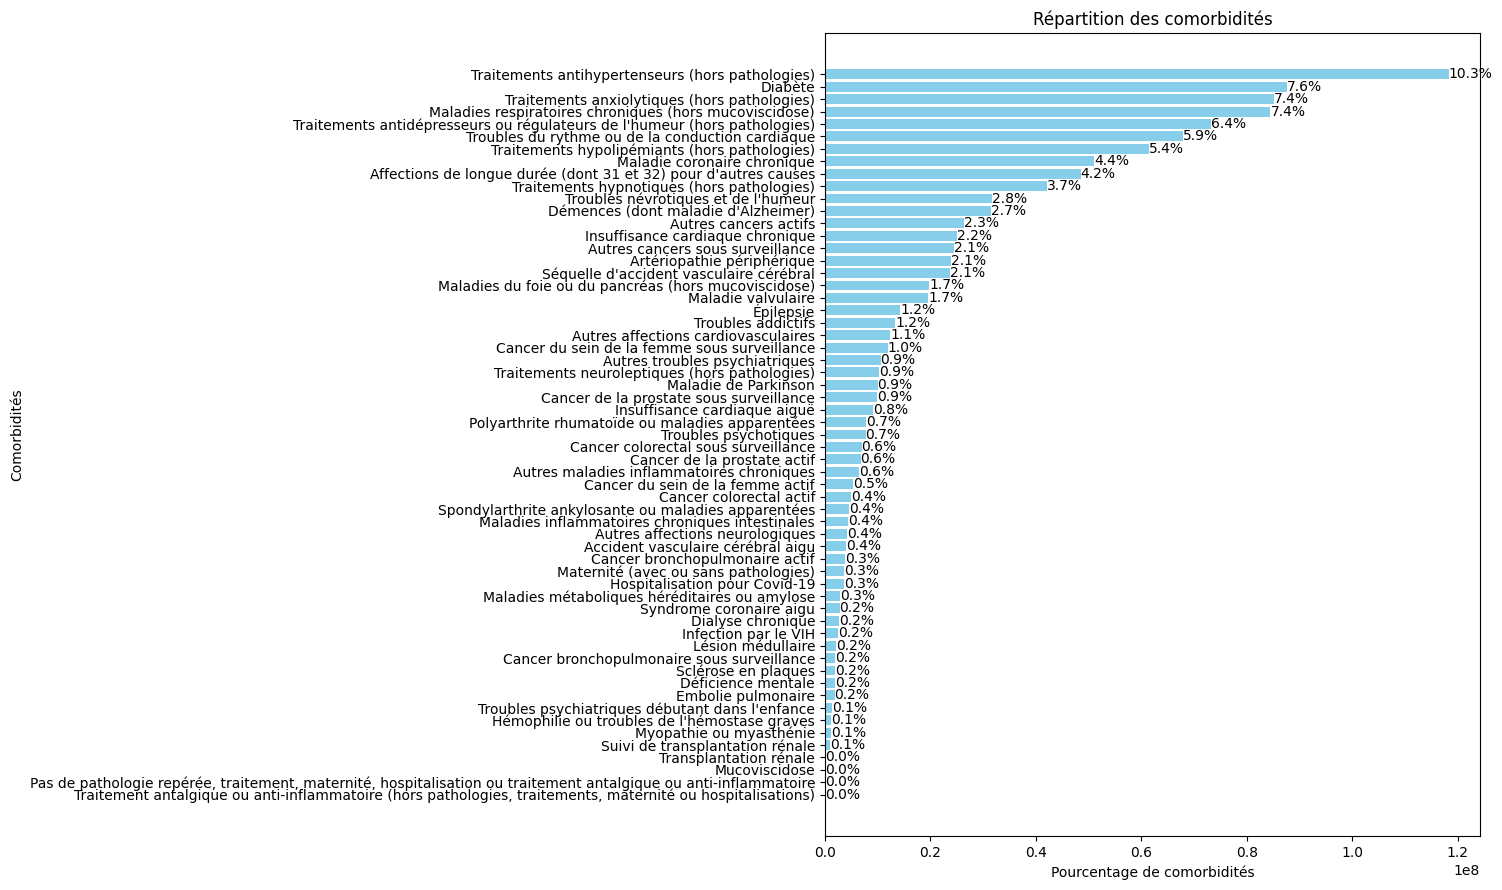

In [26]:
agg_comorbidites = comorbidites.groupby('libelle_comorbidite')['Ncomorb'].sum().reset_index()
top_comorbidites = agg_comorbidites.sort_values(by='libelle_comorbidite')
top_comorbidites['Percentage'] = (top_comorbidites['Ncomorb'] / top_comorbidites['Ncomorb'].sum()) * 100

# Trier par pourcentage décroissant au lieu de patho_niv1
top_comorbidites = top_comorbidites.sort_values(by='Percentage', ascending=False)

# Diagramme en barres horizontal
plt.figure(figsize=(15, 9)) 
plt.barh(top_comorbidites['libelle_comorbidite'], top_comorbidites['Ncomorb'], color='skyblue')

# Pourcentages sur les barres
for index, value in enumerate(top_comorbidites['Ncomorb']):
    percentage = f"{top_comorbidites['Percentage'].iloc[index]:.1f}%"
    plt.text(value, index, percentage, va='center')

plt.xlabel('Pourcentage de comorbidités')
plt.ylabel('Comorbidités')
plt.title('Répartition des comorbidités')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

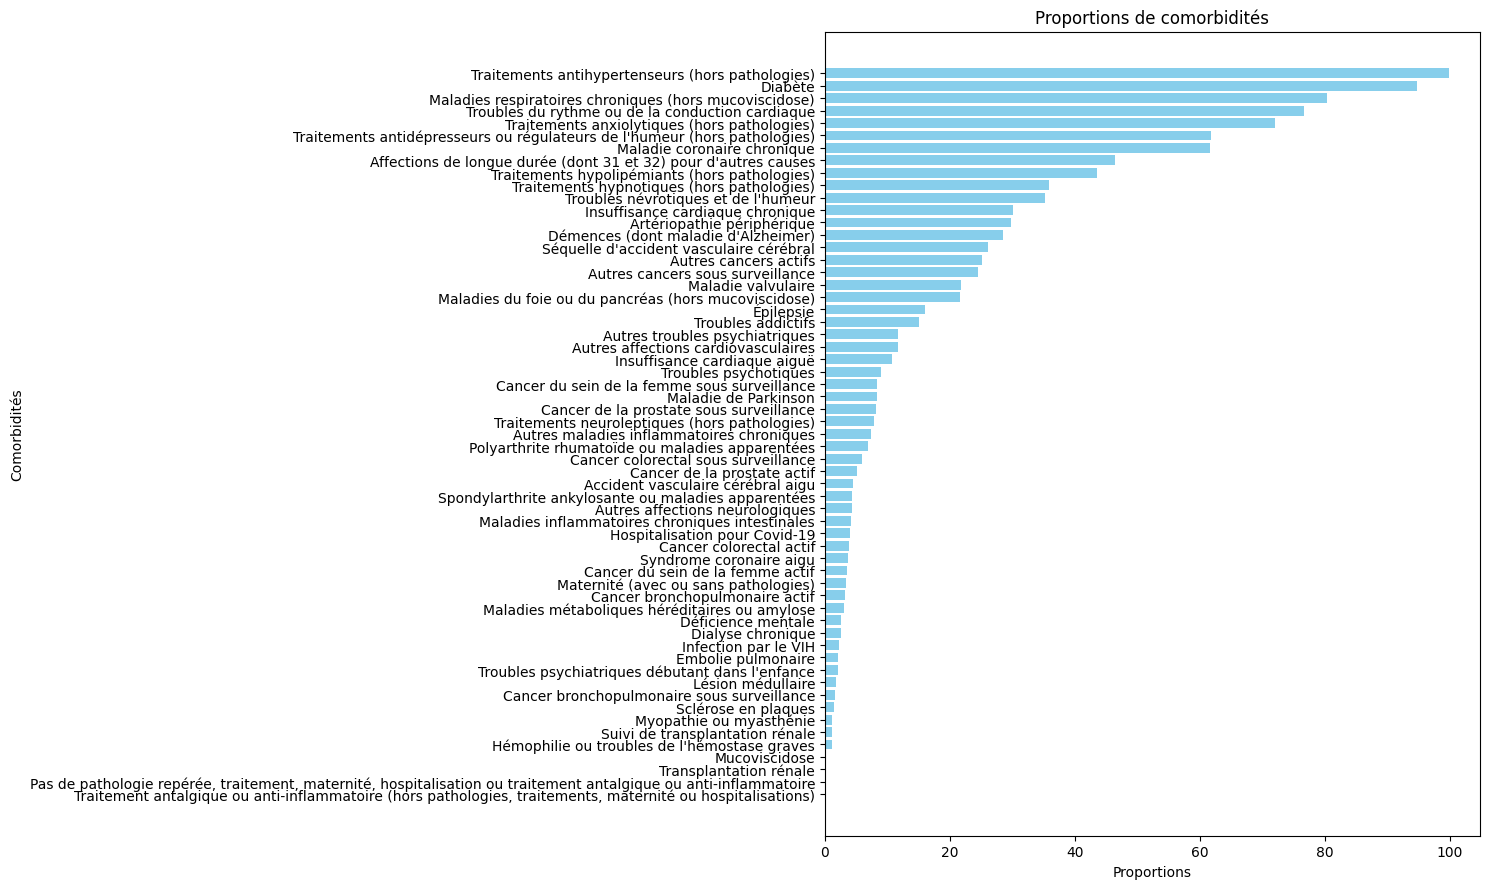

In [29]:
# Regrouper les données par 'Description' et calculer la somme des valeurs
aggprop_comorbidites = comorbidites.groupby('libelle_comorbidite')['Proportion_comorb'].sum().reset_index()

# Trier les données par 'FLT_REM_MNT' dans l'ordre décroissant
top_aggprop = aggprop_comorbidites.sort_values(by='Proportion_comorb', ascending=False)

# Tracer un diagramme en barres horizontal pour les 50 plus hautes prestations
plt.figure(figsize=(15, 9))  # Augmenter la hauteur pour une meilleure lisibilité
plt.barh(top_aggprop['libelle_comorbidite'], top_aggprop['Proportion_comorb'], color='skyblue')

# Ajouter des labels et un titre
plt.xlabel('Proportions')
plt.ylabel('Comorbidités')
plt.title('Proportions de comorbidités')

# Inverser l'ordre pour afficher les barres du plus grand au plus petit
plt.gca().invert_yaxis()

# Afficher le graphique
plt.tight_layout()  # Pour ajuster les marges automatiquement
plt.show()